In [1]:

import numpy as np # type: ignore
import pandas as pd  # type: ignore
import matplotlib as mpl # type: ignore


In [2]:
data = pd.read_csv(r'C:\Users\chakr\OneDrive\Desktop\ml\house-price-prediction\data\train.csv')  # while be loading the dat in data variable 

data.head(10)
data['price'].mean()

4766729.247706422

In [3]:
data.info() 
print(data.isnull().sum()) # to check the null values in dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0


# dealing with the missing values

In [4]:
# Drop columns that have more than 50% missing values
data = data.dropna(thresh=len(data)*0.5, axis=1)

# Fill missing values with mean for numerical columns
feature_ncols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in feature_ncols:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values with mode for categorical columns
feature_ccols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in feature_ccols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check if all missing values are handled
data.info()

# Remove duplicates
data = data.drop_duplicates()

# Preview cleaned data
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#  Data Exploration

# feature Encoding for caterorial variables

In [5]:
from sklearn.preprocessing import LabelEncoder # type: ignore
label = LabelEncoder()

cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in cat_cols:
    data[col] = label.fit_transform(data[col])

print(data)   

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

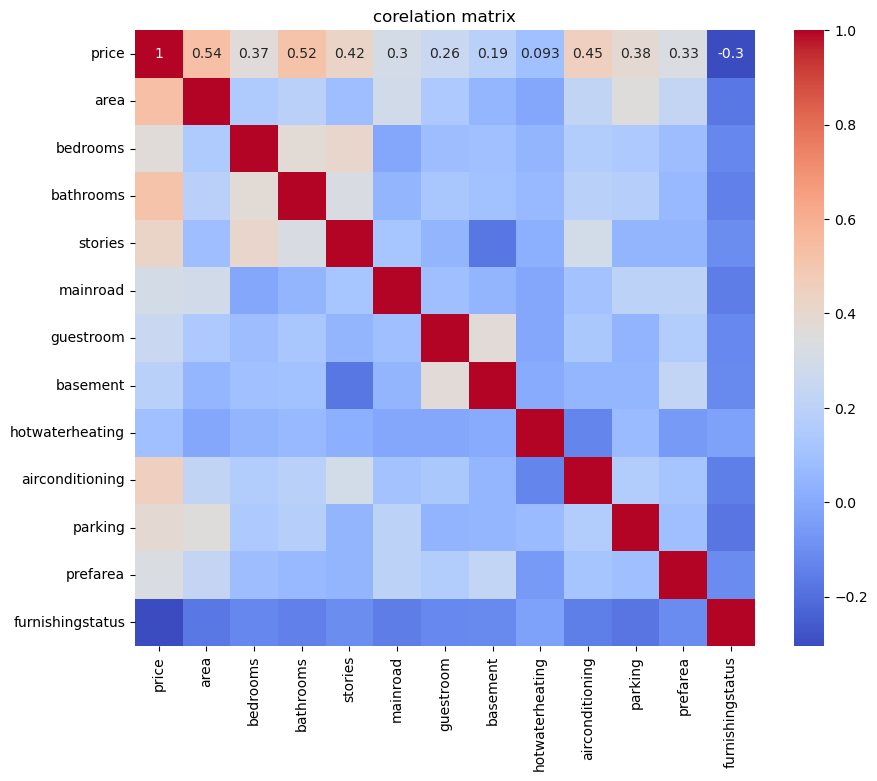

In [6]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

corr_matrix = data.corr()
plt.figure(figsize=(10,8))
plt.title("corelation matrix")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Convert columns in 'feature_ncols' to numeric if possible
for col in feature_ncols:
	data[col] = pd.to_numeric(data[col], errors='coerce')


In [7]:

# 
sorted_corr = corr_matrix['price'].sort_values(ascending=False)
sorted_corr.head()


weak_features = ['hotwaterheating', 'basement', 'furnishingstatus']  # only if correlation is very low
# Drop only the columns that exist in the DataFrame
existing_features = [col for col in weak_features if col in data.columns]
data = data.drop(existing_features, axis=1)


# split the data into train and test

In [8]:
x = data.drop('price',axis=1)
y = data['price']

In [9]:
from sklearn.model_selection import train_test_split # type: ignore
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) # splitting the data into training and testing data

print(x_test)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  airconditioning  \
333  3000         3          1        2         1          0                0   
84   3760         3          1        2         1          0                0   
439  3930         2          1        1         0          0                0   
396  3640         2          1        1         1          0                0   
161  6100         3          1        3         1          1                1   
..    ...       ...        ...      ...       ...        ...              ...   
100  6600         3          2        1         1          0                1   
344  3850         2          1        1         1          0                0   
176  8520         3          1        1         1          0                1   
244  5320         3          1        2         1          1                0   
15   6000         4          1        2         1          0                0   

     parking  prefarea  
33

# model training with LInear regresson

In [10]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

model = LinearRegression()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 
model.fit(x_train_scaled, y_train)

predict = model.predict(x_test_scaled)
print(np.round(predict, 2))

[ 3275430.92  4069714.96  2610778.81  3223291.5   6650903.74  4166876.12
  3885534.81  3364448.34  3408063.4   3612245.63  4017179.45  3445607.84
  4080780.74  5483957.59  5175393.21  7014348.56  7244502.97  3844610.
  3442080.02  4582658.77  5651164.48  4848225.24  4968955.44  6102116.55
  2351356.62  2464175.29  3024531.16  4130755.47  5401952.91  3141904.79
  4405010.41  3611758.99  4038002.17  4968032.87  4152374.63  6954634.44
  2821973.83  5715961.8   5233017.65  3015065.93  7223779.63  3631500.59
  3675194.8   4303564.67  3342751.3   3420402.14  3408063.4   3103375.16
  4498482.17  4578978.3  10587479.11  5860771.96  3290671.89  3024531.16
  4300781.56  6295916.25  6721463.16  4566108.91  2374246.82  6459438.75
  3323526.81  2912623.55  4639786.41  7111637.63  6407772.99  4659984.55
  3690376.42  4861673.23  3123282.85  5083406.4   5979275.94  5465592.82
  6209811.95  5722159.12  4212142.82  5402432.85  6401197.79  4751545.32
  8951806.65  4991278.09  6968151.15  3464910.85  395

In [11]:

from xgboost import XGBRegressor # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

scaler = StandardScaler()
XGmodel = XGBRegressor()
XGmodel.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# model evaluation

In [12]:
mse = mean_squared_error(y_test,predict)
rmse = mse ** 0.5
r2 = r2_score(y_test,predict)
mape = mean_absolute_percentage_error(y_test,predict)* 100
print("mse :",mse)
print("rmse :",rmse)
print("r2 :",r2)
print("accuracy:",100-mape)


mse : 1310011754117.0078
rmse : 1144557.4490242978
r2 : 0.6308864562267832
accuracy: 83.03449377215487


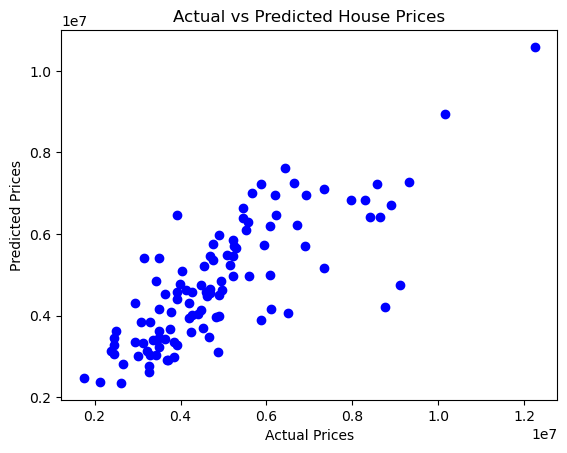

In [13]:
plt.scatter(y_test, predict, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [14]:
import joblib # type: ignore

joblib.dump(model,r'C:\Users\chakr\OneDrive\Desktop\ml\house-price-prediction\models\house-linear.pkl')

joblib.dump(XGmodel,r'C:\Users\chakr\OneDrive\Desktop\ml\house-price-prediction\models\house-xgboost.pkl')

['C:\\Users\\chakr\\OneDrive\\Desktop\\ml\\house-price-prediction\\models\\house-xgboost.pkl']

In [15]:
# Remove the first feature (price) from the test input to match the training features
test = [7420,4,2,3,'yes','no','yes',2,'yes'] 
# Ensure it has 9 features
for i in range(len(test)):
    if isinstance(test[i], str):
        test[i] = label.fit_transform([test[i]])[0]

# Fit the scaler to the training data if not already fitted
if not hasattr(scaler, 'mean_'):
    scaler.fit(x_train)

test = scaler.transform([test])
p1 = model.predict(test)
print(np.round(p1,2)) 

p2 = XGmodel.predict(test)
print(p2)

[6176971.07]
[8894082.]


C:\Users\chakr\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
